# Mushroom Classification using Machine Learning

# Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.



# Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

In [2]:
# Load the data
df= pd.read_csv("mushroom.csv")

In [3]:
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
# print the first 20 rows of titanic dataset
df.head(20)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
5,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
6,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
7,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
8,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
9,e,x,y,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g


In [5]:
#lets provide the column names to the dataset
df.columns=["type","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"]

In [6]:
df.columns

Index(['type', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
# Check df.head()
df.head(10)

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
5,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
6,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
7,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
8,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
9,e,x,y,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g


In [8]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   type                      8123 non-null   object
 1   cap-shape                 8123 non-null   object
 2   cap-surface               8123 non-null   object
 3   cap-color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill-attachment           8123 non-null   object
 7   gill-spacing              8123 non-null   object
 8   gill-size                 8123 non-null   object
 9   gill-color                8123 non-null   object
 10  stalk-shape               8123 non-null   object
 11  stalk-root                8123 non-null   object
 12  stalk-surface-above-ring  8123 non-null   object
 13  stalk-surface-below-ring  8123 non-null   object
 14  stalk-color-above-ring  

In [9]:
# Get some statistics in which we get counts, unique, top and frequency
df.describe()

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [10]:
# Lets' check the null values
df.isnull().sum()

type                        0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In above outcome, There is no null value

In [11]:
# Get the shape of dataset
print("Data_Shape:", df.shape)

Data_Shape: (8123, 23)


It shows that our dataset contain 8124 rows and 23 columns

In [12]:
# Unique occurrence of 'type'
df['type'].unique

<bound method Series.unique of 0       e
1       e
2       p
3       e
4       e
       ..
8118    e
8119    e
8120    e
8121    p
8122    e
Name: type, Length: 8123, dtype: object>

Here , we can see that there are two unique value in 'type' column

In [13]:
# Count of Unique occurrence of 'type'
df['type'].value_counts()

e    4208
p    3915
Name: type, dtype: int64

'e' stands for edible mushroom and p stands for poisonous mushroom

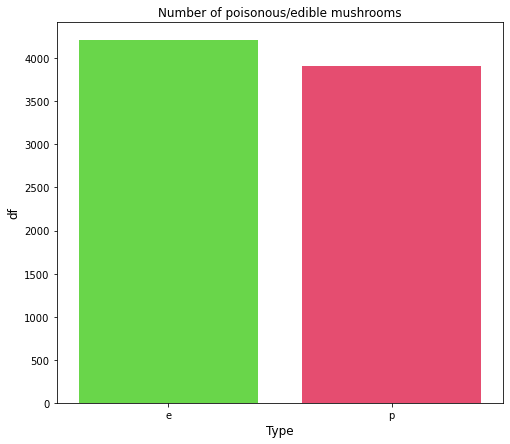

In [14]:
# Let's visualize the count of edible and poisonous mushroom using seaborn
df_type=df['type'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(df_type.index, df_type.values, alpha=0.8, palette="prism")
plt.ylabel('df', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

In this bar plot, we can see that , dataset is balanced

In [15]:
# Check data type
df.describe()

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [16]:
# Lets convert object data type into intergiors
labelencoder=LabelEncoder()
for column in df:
    df[column] = labelencoder.fit_transform(df[column])

In [17]:
# Check the dataset again
df.head(5)

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [18]:
# column 'veil-type' is 0, so we'll remove it as there is no contribution of it in dataset
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8118    0
8119    0
8120    0
8121    0
8122    0
Name: veil-type, Length: 8123, dtype: int32

In [19]:
df=df.drop(['veil-type'], axis=1)

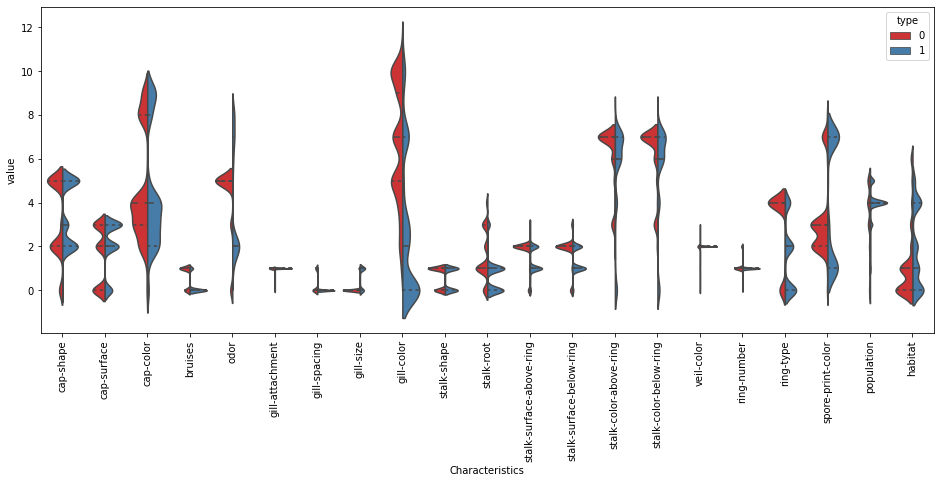

In [20]:
# Characteristics of the data
df_div = pd.melt(df, "type", var_name='Characteristics')
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax,x='Characteristics', y="value", hue="type", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_type = df.drop(["type"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_type.columns));


This violin plot represents the distribution of the classification characteristics

In [21]:
# Let's check the correlation between variables
df_cor= df.corr()

In [22]:
df_cor

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
type,1.000000,0.052826,0.178440,-0.031361,-0.501758,-0.093675,0.129188,-0.348358,0.539944,-0.530574,...,-0.334712,-0.298901,-0.154096,-0.146824,0.145133,-0.214349,-0.411942,0.172063,0.298776,0.216990
cap-shape,0.052826,1.000000,-0.050475,-0.048181,-0.035530,-0.022050,0.078850,0.013253,0.053872,-0.006010,...,-0.030507,-0.032668,-0.031741,-0.030473,0.072547,-0.106509,-0.025580,-0.073337,0.063484,-0.042492
cap-surface,0.178440,-0.050475,1.000000,-0.019398,0.070214,0.045220,-0.034183,-0.282302,0.208103,-0.161014,...,0.089081,0.107957,0.066041,0.068876,-0.016606,-0.026143,-0.106429,0.230382,0.021564,0.163893
cap-color,-0.031361,-0.048181,-0.019398,1.000000,-0.000736,-0.387119,0.041440,0.144250,-0.169452,0.084654,...,-0.060822,-0.047697,0.002379,0.008073,0.036133,-0.005829,0.162545,-0.293548,-0.144785,0.033983
bruises,-0.501758,-0.035530,0.070214,-0.000736,1.000000,-0.061962,0.137347,-0.299438,-0.369897,0.527200,...,0.460777,0.458947,0.083456,0.092792,0.119759,0.056830,0.692933,-0.284943,0.088221,-0.075417
odor,-0.093675,-0.022050,0.045220,-0.387119,-0.061962,1.000000,-0.059611,0.063987,0.310390,-0.129195,...,0.118552,0.061761,0.174477,0.169350,-0.057765,0.111939,-0.281519,0.469163,-0.043570,-0.026839
gill-attachment,0.129188,0.078850,-0.034183,0.041440,0.137347,-0.059611,1.000000,0.071499,0.108969,-0.128563,...,-0.088933,-0.116191,0.099289,0.097150,0.897518,0.093242,-0.146716,-0.029512,0.165588,-0.030353
gill-spacing,-0.348358,0.013253,-0.282302,0.144250,-0.299438,0.063987,0.071499,1.000000,-0.108268,0.100182,...,-0.212331,-0.213750,0.274618,0.253548,0.073371,0.243004,-0.195859,0.047289,-0.529296,-0.154611
gill-size,0.539944,0.053872,0.208103,-0.169452,-0.369897,0.310390,0.108969,-0.108268,1.000000,-0.516767,...,0.056194,0.010788,0.296482,0.278636,0.103797,-0.171339,-0.461135,0.623217,0.147799,0.161107
gill-color,-0.530574,-0.006010,-0.161014,0.084654,0.527200,-0.129195,-0.128563,0.100182,-0.516767,1.000000,...,0.224313,0.257247,-0.058283,-0.074765,-0.097579,0.096047,0.629462,-0.416167,-0.034105,-0.202967


<AxesSubplot:>

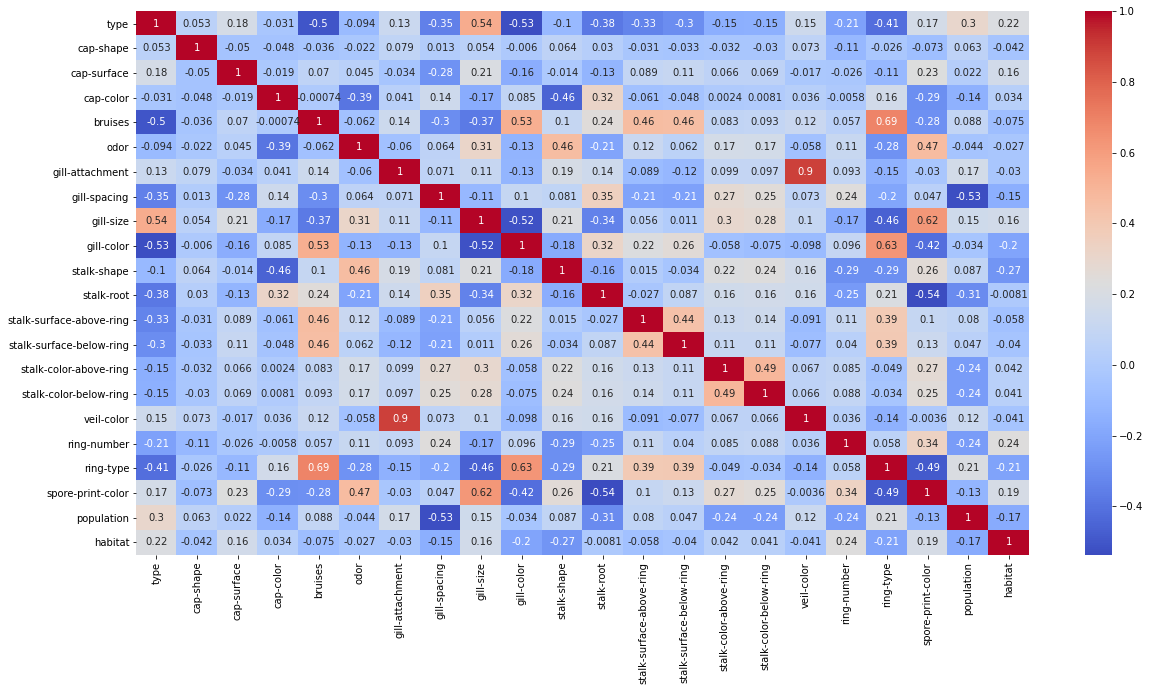

In [23]:
# visualize correlation between the variables using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_cor, annot=True , cmap='coolwarm')

Here we can see that negative correlation between 'type' and 'gill-color' is -0.53.  Usually, the least correlating variable is the most important one for classification.

so, Let's look it closely

In [24]:
df[['type', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='type', ascending=False)

,gill-color,type
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.154791
5,5,0.106870
9,9,0.097561


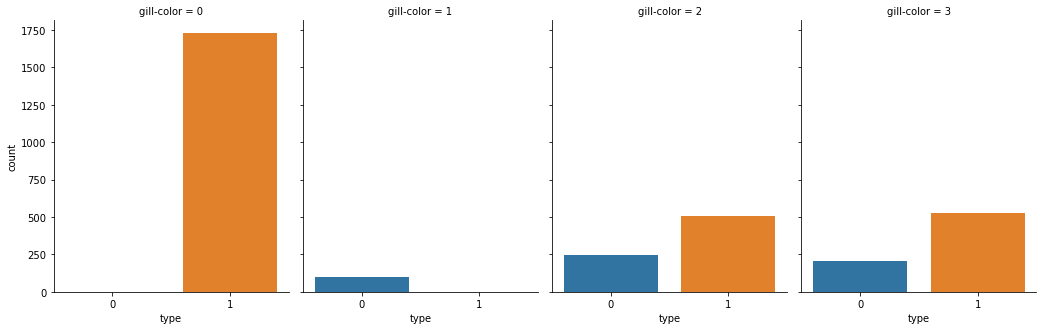

In [25]:
# Let's look closely at the feature
df_var = df[['type', 'gill-color']]
df_var = df_var[df_var['gill-color']<=3.5]
sns.factorplot('type', col='gill-color', data=df_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

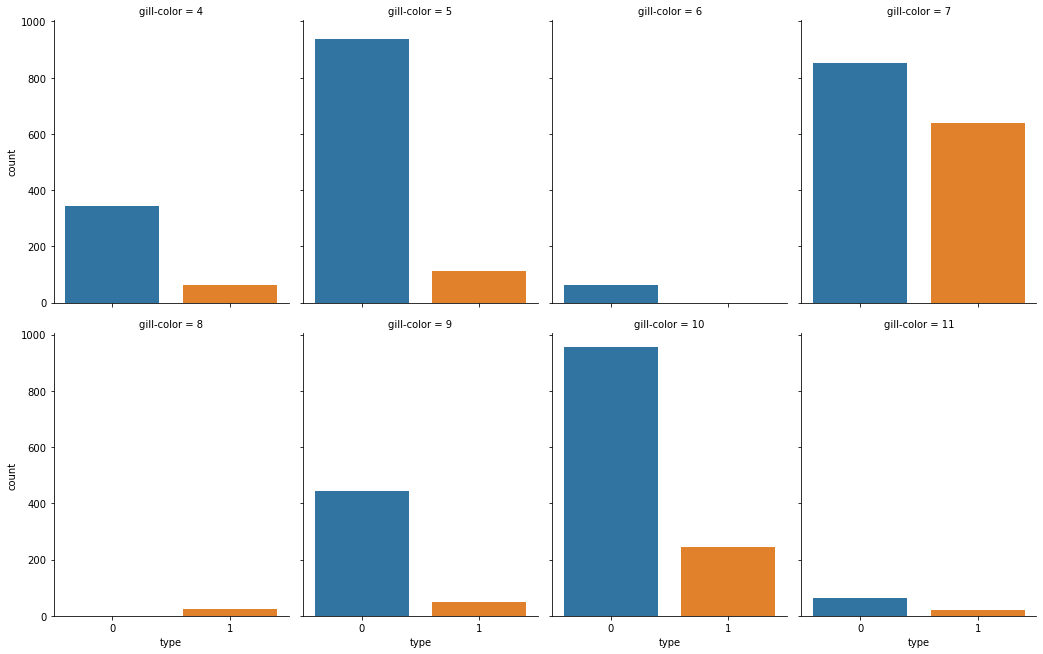

In [26]:
df_var = df[['type', 'gill-color']]
df_var = df_var[df_var['gill-color']>3.5]
sns.factorplot('type', col='gill-color', data=df_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

# Preparing the data for Prediction

In [27]:
# Drop the 'type' column
x = df.drop(['type'], axis=1)
y = df['type']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.1)

# Model Training

# Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)

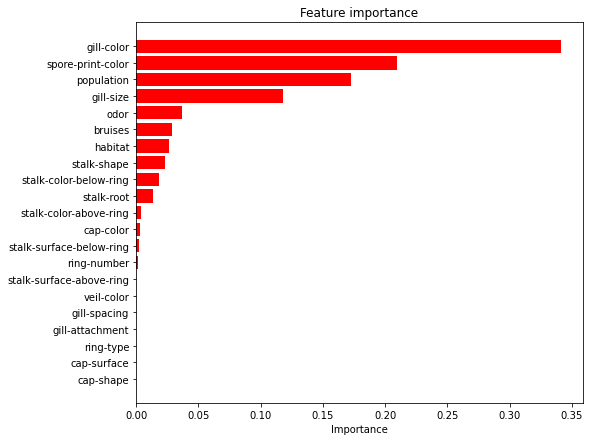

In [29]:
# Features Importance
features_list = x.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)),features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

In [30]:
# Predicting and estimating the result
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(x_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       434
           1       1.00      1.00      1.00       379

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


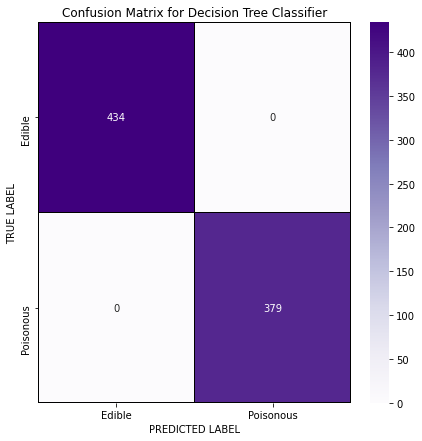

In [31]:
# Confusion Matrix for Decision Tree Classifier
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Logistic Regression Classifier

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test, y_test)*100,2)))

Test Accuracy: 96.06%


In [33]:
# Classification report of Logistic Regression Classifier
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.97      0.96      0.96       434
           1       0.95      0.96      0.96       379

    accuracy                           0.96       813
   macro avg       0.96      0.96      0.96       813
weighted avg       0.96      0.96      0.96       813



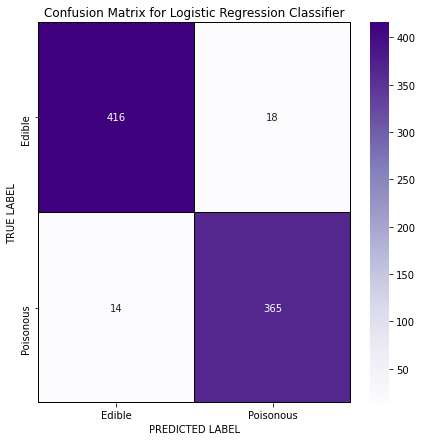

In [34]:
# Confusion Matrix for Logistic Regression Classifier
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# KNN Classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    if knn.score(x_test, y_test) > best_score:
        best_score = knn.score(x_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [36]:
# Classification report of KNN Classification
y_pred_knn = knn.predict(x_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       434
           1       1.00      1.00      1.00       379

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



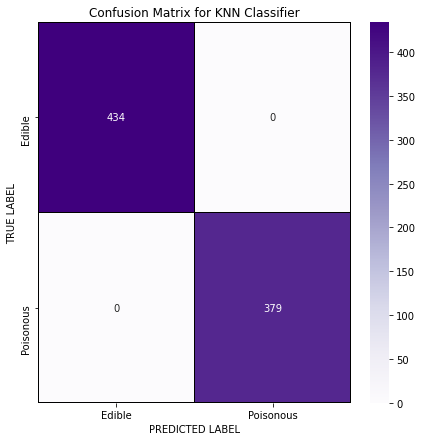

In [37]:
# Confusion Matrix for KNN Classification
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# SVM Classification

In [38]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [39]:
# Classification report of SVM Classification
y_pred_svm = svm.predict(x_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       434
           1       1.00      1.00      1.00       379

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



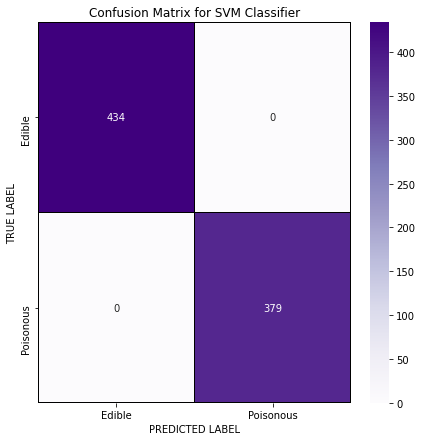

In [40]:
# Confusion Matrix for SVM Classification
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

# Naive Bayes Classification

In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test, y_test)*100, 2)))

Test Accuracy: 94.34%


In [42]:
# Classification report of Naive Bayes Classification
y_pred_nb = nb.predict(x_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.93      0.95       434
           1       0.92      0.96      0.94       379

    accuracy                           0.94       813
   macro avg       0.94      0.94      0.94       813
weighted avg       0.94      0.94      0.94       813



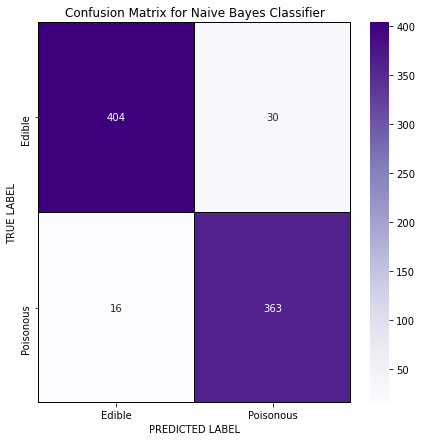

In [43]:
# Confusion Matrix for Naive Bayes Classification
cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [45]:
# Classification report of Random Forest Classifier
y_pred_rf = rf.predict(x_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       434
           1       1.00      1.00      1.00       379

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



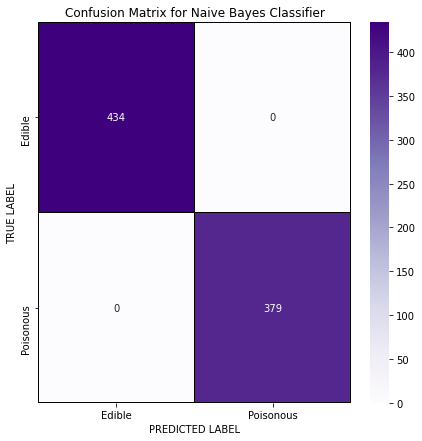

In [46]:
# Confusion Matrix for Random Forest Classifier
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Prediction

In [47]:
preds = dt.predict(x_test)
print(preds[:36])
print(y_test[:36].values)
# 0 - Edible
# 1 - Poisonous

[1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1]
[1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1]


As we can see, the predicted and the true values match 100%.

# Conclusion

From the confusion matrix, we saw that our train and test data is balanced.
Most of the classification methods hit 100% accuracy with this dataset.